<a href="https://colab.research.google.com/github/sinha-diksha/Natural_Disaster_Prediction/blob/main/tsunami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the pandas library for data manipulation and analysis
# Importing the pylab module from matplotlib for creating plots and visualizations
# Importing the numpy library for numerical computing
# Importing the optimization module from scipy for optimization algorithms and tools
# Importing the preprocessing module from scikit-learn for data preprocessing tasks
# Importing evaluation metrics for regression models
# Magic command to display matplotlib plots inline in Jupyter notebooks
# Importing the pyplot module from matplotlib for plotting
# Importing the seaborn library for statistical data visualization
# Importing the ColumnTransformer class for column-wise transformations
# Importing specific preprocessing techniques
# Importing the Pipeline class for building machine learning pipelines
# Importing the RandomForestClassifier class for random forest classification



import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
import gdown


url = 'https://drive.google.com/file/d/1vQch-KWyGj1QdJWrdXaykn24Qycufxl4/view?usp=sharing'  # using the tsunami.csv
file_id = url.split('/')[-2]
gdown_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(gdown_url)
print(data.head())

                                          title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst   dmin   gap magType    depth  \
0    8    7  green        1  768  us  117  0.509  17.0     mww   14.000   
1    4    4  green        0  735  us   99  2.229  34.0     mww   25.000   
2    3    3  green        1  755  us  147  3.125  18.0     mww  579.000   
3    5    5  green        1  833  us  149  1.865  21.0     mww   37.000   
4    0    2  green        1  670  us  131  4.998  27.0     mww  624.464   

   latitude  longitude                  location continent          

In [ ]:
data

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [ ]:
for col in data.columns:
    print(col, ":", round(data[col].isna().sum() / data.shape[0] * 100, 2))

title : 0.0
magnitude : 0.0
date_time : 0.0
cdi : 0.0
mmi : 0.0
alert : 46.93
tsunami : 0.0
sig : 0.0
net : 0.0
nst : 0.0
dmin : 0.0
gap : 0.0
magType : 0.0
depth : 0.0
latitude : 0.0
longitude : 0.0
location : 0.64
continent : 73.66
country : 38.11


print(col, ":", round(data[col].isna().sum() / data.shape[0] * 100, 2)): For each column, it prints the column name followed by a colon. Inside the print statement, the percentage of missing values is calculated using data[col].isna().sum() / data.shape[0] * 100. data[col].isna().sum() counts the number of missing values in the column, and data.shape[0] gives the total number of rows in the DataFrame. The result is multiplied by 100 to get the percentage. The round function is used to round the percentage to two decimal places.

In [ ]:
data.drop(labels=['alert', 'continent', 'country', 'location', 'title'], axis=1, inplace=True) #drop unusable value

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)
data

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,22-11-2022 02:03,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,18-11-2022 13:37,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,12-11-2022 07:09,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,11-11-2022 10:48,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,09-11-2022 10:14,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,13-01-2001 17:33,0,8,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,10-01-2001 16:02,5,7,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,09-01-2001 16:49,0,7,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,01-01-2001 08:54,0,5,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


In [ ]:
data

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,22-11-2022 02:03,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,18-11-2022 13:37,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,12-11-2022 07:09,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,11-11-2022 10:48,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,09-11-2022 10:14,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,13-01-2001 17:33,0,8,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,10-01-2001 16:02,5,7,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,09-01-2001 16:49,0,7,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,01-01-2001 08:54,0,5,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M') # Convert data type into date time format
data['time'] = data['date_time'].dt.strftime('%H:%M') # Extract only time
data.drop(['date_time'], axis=1, inplace=True) # Drop unused column
data['time']

0      02:03
1      13:37
2      07:09
3      10:48
4      10:14
       ...  
777    17:33
778    16:02
779    16:49
780    08:54
781    06:57
Name: time, Length: 782, dtype: object

In [ ]:
# Define time intervals and corresponding labels
bins = pd.to_datetime(['00:00', '06:00', '18:00', '23:59'], format='%H:%M')
labels = ['Night', 'Day', 'Night']
# Categorize the time column based on the defined intervals
data['time'] = pd.cut(pd.to_datetime(data['time'], format="%H:%M"), bins=bins, labels=labels, ordered=False)
data

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,time
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Night
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,Day
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Day
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,Day
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,Day
778,6.9,5,7,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,Day
779,7.1,0,7,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,Day
780,6.8,0,5,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,Day


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  782 non-null    float64 
 1   cdi        782 non-null    int64   
 2   mmi        782 non-null    int64   
 3   tsunami    782 non-null    int64   
 4   sig        782 non-null    int64   
 5   net        782 non-null    object  
 6   nst        782 non-null    int64   
 7   dmin       782 non-null    float64 
 8   gap        782 non-null    float64 
 9   magType    782 non-null    object  
 10  depth      782 non-null    float64 
 11  latitude   782 non-null    float64 
 12  longitude  782 non-null    float64 
 13  time       781 non-null    category
dtypes: category(1), float64(6), int64(5), object(2)
memory usage: 80.4+ KB


<Axes: xlabel='tsunami', ylabel='count'>

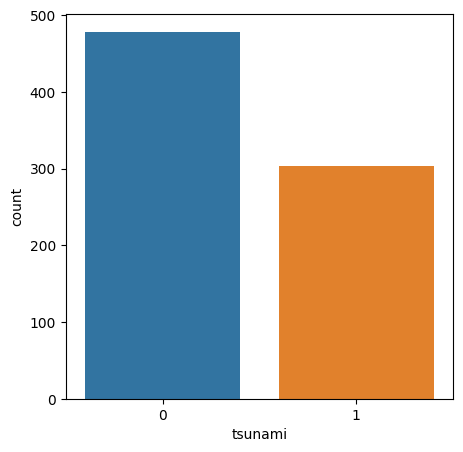

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='tsunami')


<Axes: xlabel='tsunami', ylabel='count'>

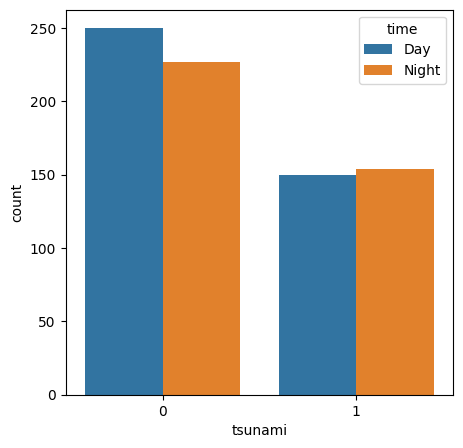

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='tsunami', hue='time')

In [ ]:
data.drop(labels='time', axis=1, inplace=True)

<Axes: xlabel='tsunami', ylabel='count'>

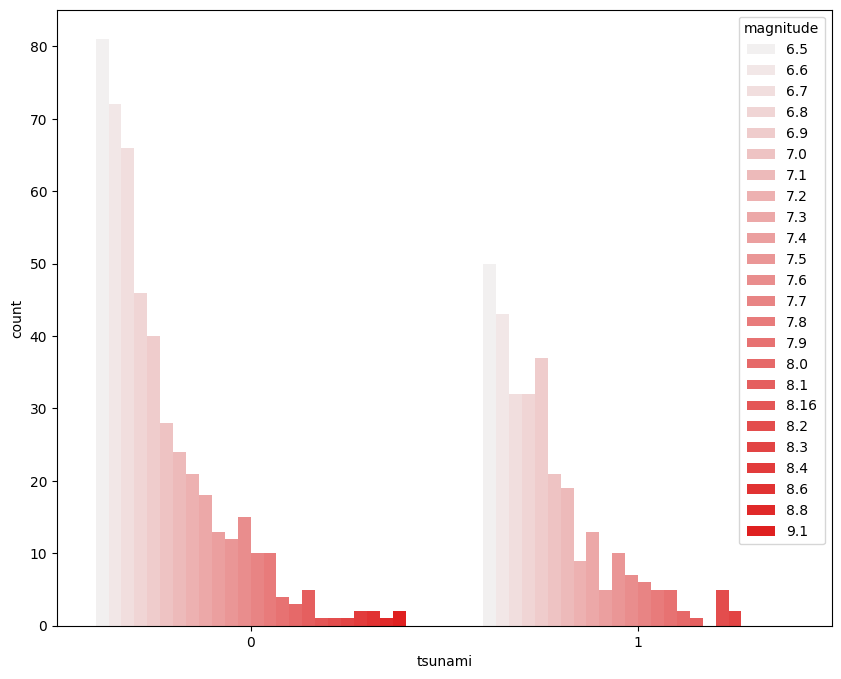

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='tsunami', hue='magnitude', color='red')

In [ ]:
data['magType'].value_counts()

mww    468
mwc    217
mwb     70
mw      16
Mi       4
ms       2
mb       2
md       2
ml       1
Name: magType, dtype: int64

<Axes: xlabel='tsunami', ylabel='count'>

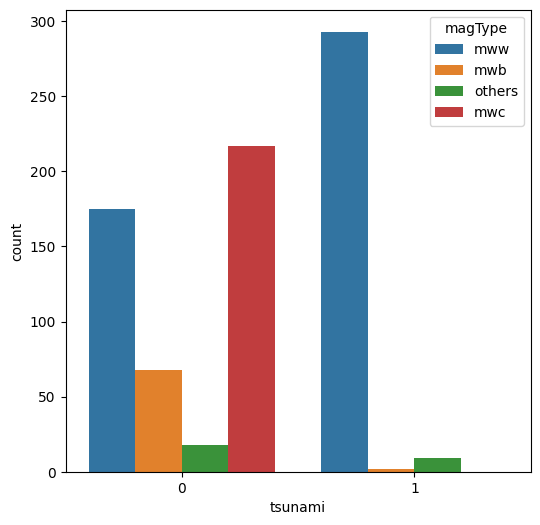

In [ ]:
data['magType'] = data['magType'].replace({'mw': 'others', 'Mi': 'others', 'ms': 'others', 'mb': 'others', 'md': 'others', 'ml': 'others'})
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='tsunami', hue='magType')

<Axes: xlabel='tsunami', ylabel='count'>

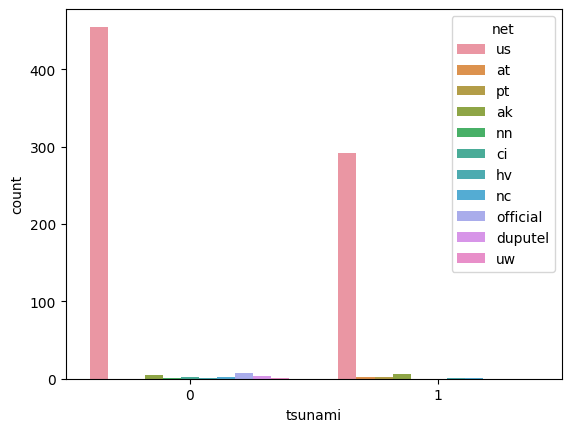

In [ ]:
sns.countplot(data=data, x='tsunami', hue='net')

In [ ]:
data.drop(labels='net', axis=1, inplace=True) # Drop the 'net' column from the data DataFrame

In [ ]:
import geopandas as gpd

# Load the map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

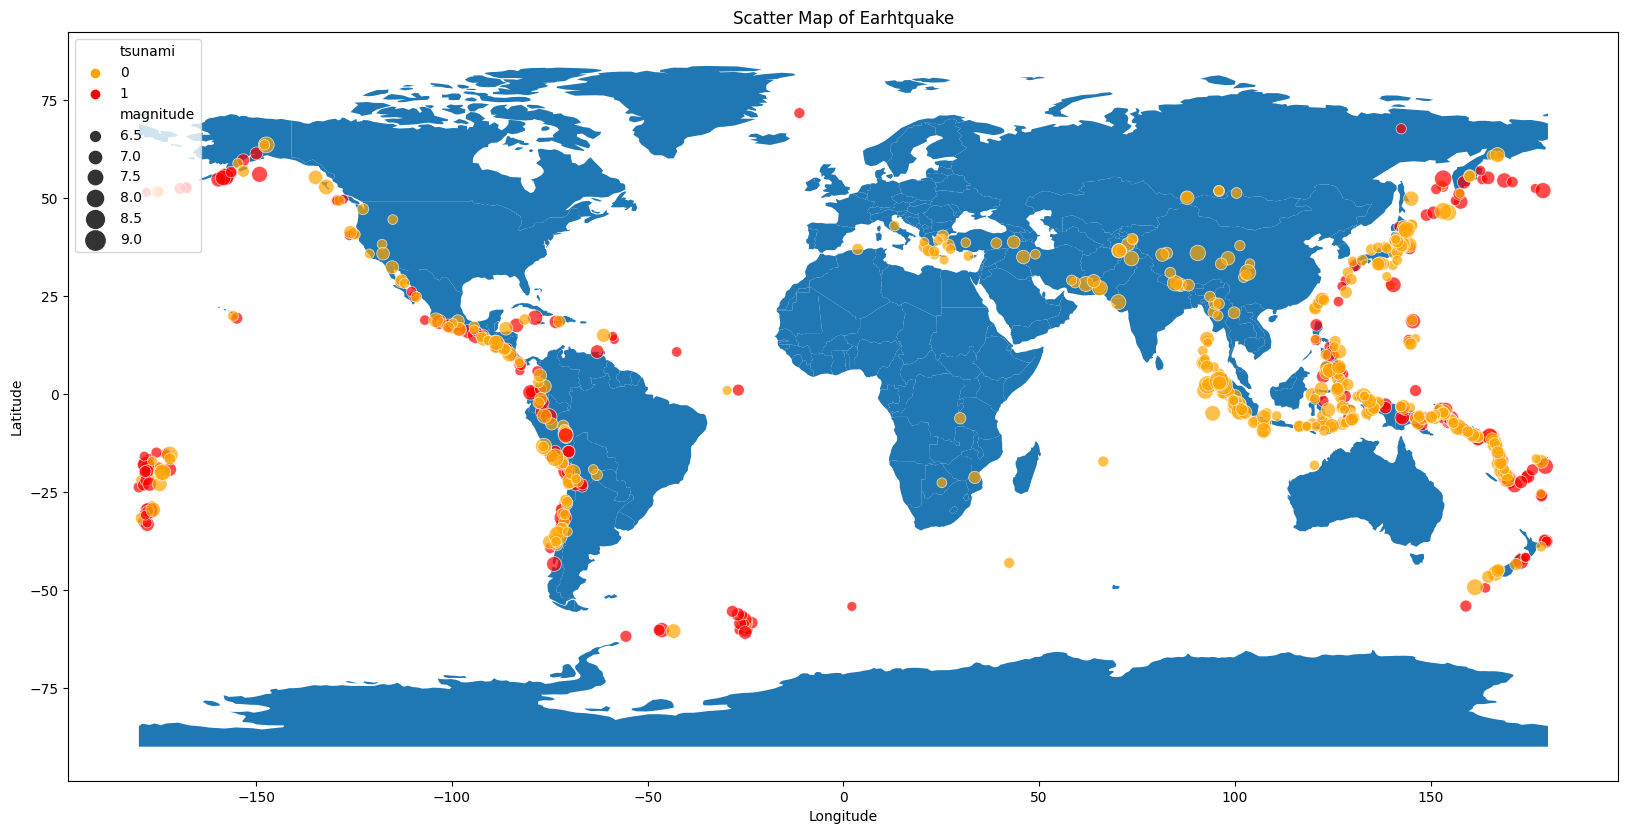

In [ ]:
# Create a figure and axes object with specified size
fig, ax = plt.subplots(figsize=(20, 15))
# Plot the world map on the axes
world_map.plot(ax=ax)
# Create a scatter plot of earthquake data on the same axes
sns.scatterplot(data=data, x='longitude', y='latitude', ax=ax, size='magnitude', sizes=(50, 200), alpha=0.7, hue='tsunami', palette={0: 'orange', 1: 'red'})
# Set labels and title for the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Scatter Map of Earhtquake')
# Add a legend to indicate the color scheme for 'tsunami' values
plt.legend(loc='upper left')

In [ ]:
data.drop(labels=list(['longitude', 'latitude']), axis=1, inplace=True)

<Axes: >

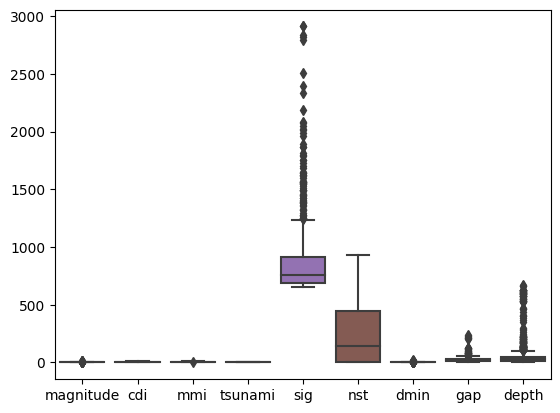

In [ ]:
sns.boxplot(data=data)

<Axes: >

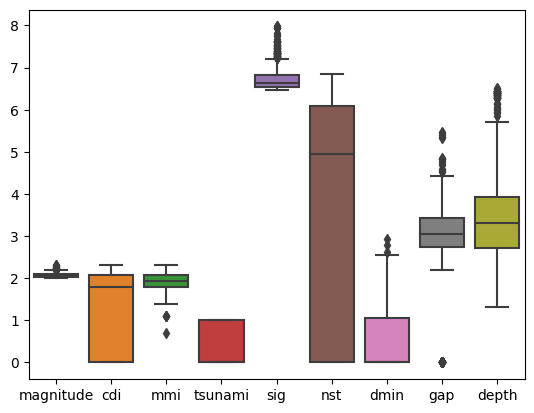

In [ ]:
for col in ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth']:

    data[col] = np.log1p(data[col])
# Check outlier
sns.boxplot(data=data)

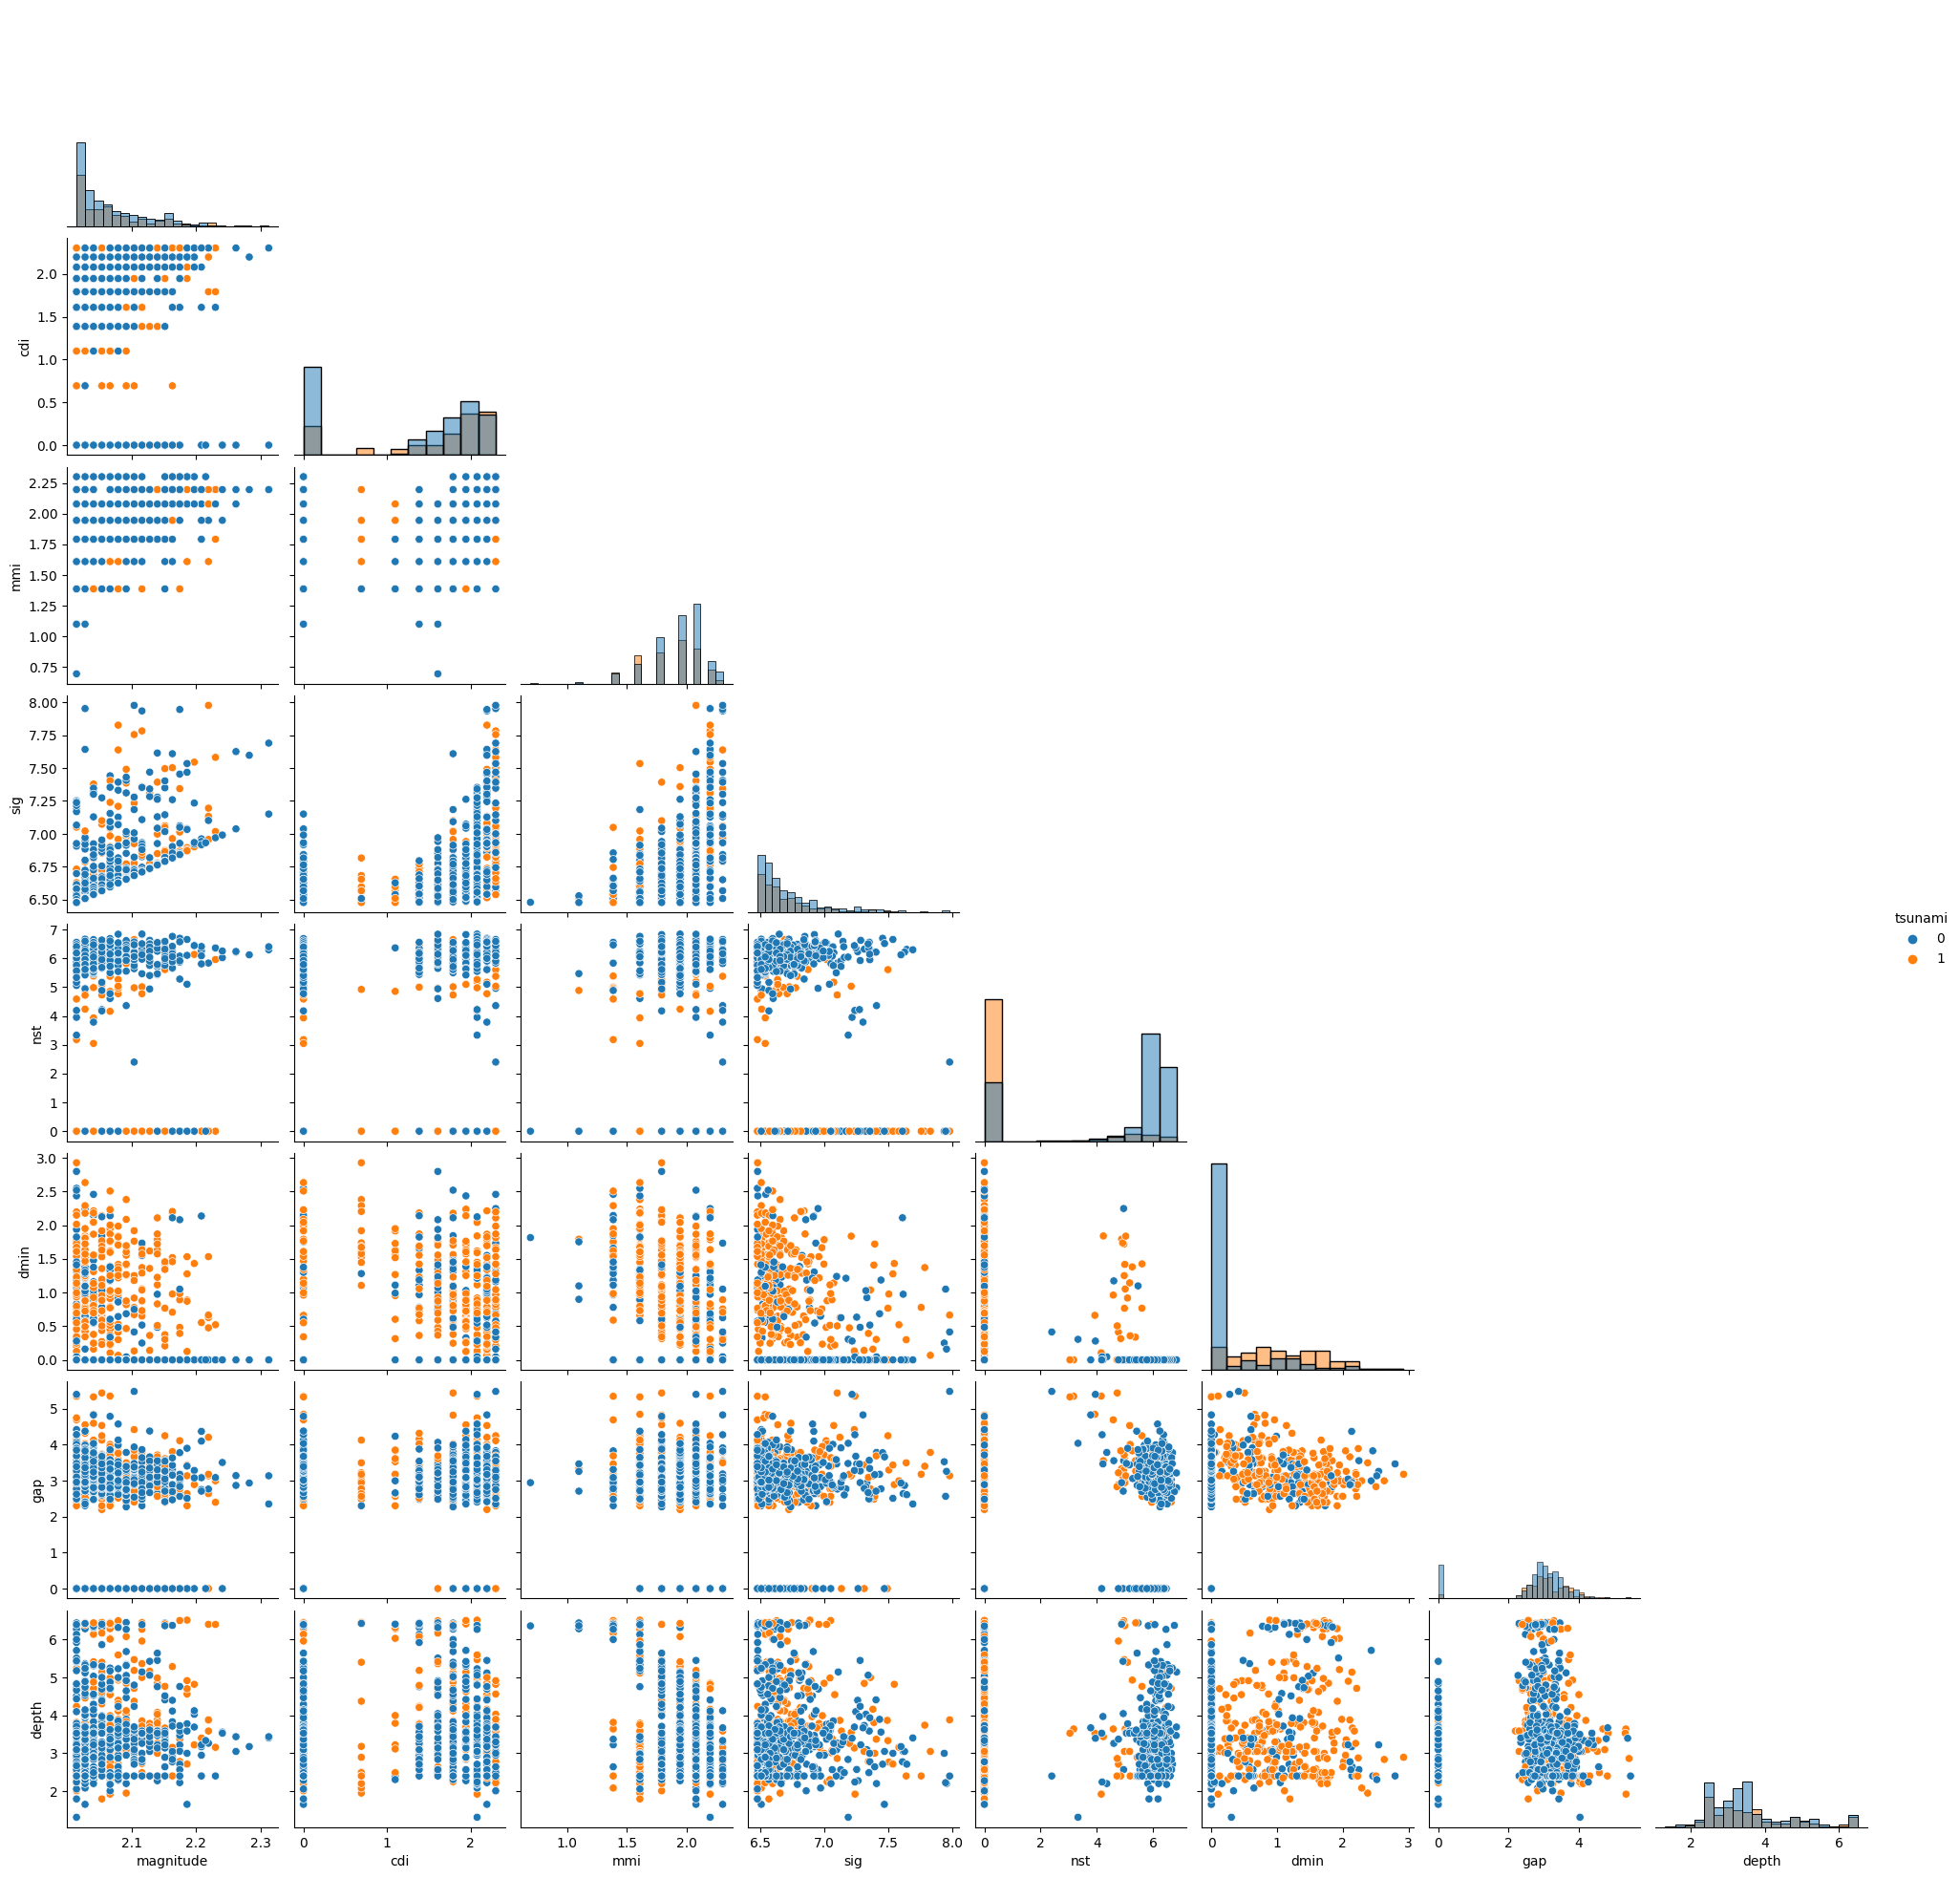

In [ ]:
# Check data distribution
sns.pairplot(data, corner=True, diag_kind='hist', hue='tsunami')

<ipython-input-106-30c85715a3a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

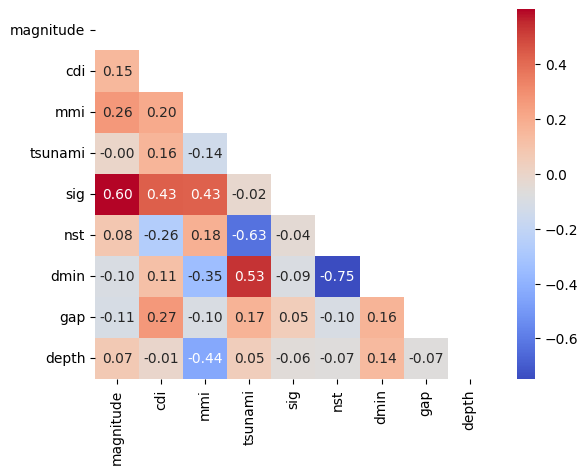

In [ ]:
# Check data correlation
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype='bool'))

sns.heatmap(correlation, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")

In [ ]:
num = list(data.select_dtypes(exclude='O').columns)
num.remove('tsunami')
cat = list(data.select_dtypes(include='O').columns)

In [ ]:
# Splitting the data into input features and target variable
X = data.drop('tsunami', axis=1) # X contains all columns except 'tsunami'
y = data.tsunami # y contains the values from the 'tsunami' column
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Checking the value counts of the target variable in the training set
y_train.value_counts()

0    334
1    213
Name: tsunami, dtype: int64

In [ ]:
def modelling(X, y, algo):
    # Define column-wise transformations for numerical and categorical features
    transform = ColumnTransformer([
        ('numerical', MinMaxScaler(), num), # Numerical features are scaled using MinMaxScaler
        ('categoric', OneHotEncoder(), cat) # Categorical features are one-hot encoded
    ])
    # Create a pipeline with transformations and the specified algorithm
    pipeline = Pipeline([
        ('transform', transform), # Apply column transformations
        ('algo', algo) # Use the specified algorithm
    ])
    # Fit the pipeline to the training data
    pipeline.fit(X, y)
    # Return the trained pipeline
    return pipeline

#Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = modelling(X=X_train, y=y_train, algo=RandomForestClassifier(random_state=42))
rf


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['magnitude', 'cdi', 'mmi',
                                                   'sig', 'nst', 'dmin', 'gap',
                                                   'depth']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['magType'])])),
                ('algo', RandomForestClassifier(random_state=42))])

In [ ]:
rf.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['magnitude', 'cdi', 'mmi',
                                                   'sig', 'nst', 'dmin', 'gap',
                                                   'depth']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['magType'])])),
                ('algo', RandomForestClassifier(random_state=42))])

In [ ]:
# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [ ]:
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.38592249249397986


In [ ]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.3723290598290597


In [ ]:
print('Accuracy Data Train : ', rf.score(X_train, y_train))
print('Accuracy Data Test : ', rf.score(X_test, y_test))

Accuracy Data Train :  1.0
Accuracy Data Test :  0.851063829787234


In [ ]:

# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_pred)


array([[124,  20],
       [ 15,  76]])

In [ ]:
# Display accuracy score
accuracy_score(y_test, y_pred)


0.851063829787234

In [ ]:
# Display F1 score
f1_score(y_test,y_pred)

0.8128342245989305